# Setting Up

**Install and Import Dependencies**

In [3]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

^C


In [347]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [348]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

**Setting GPU Growth**

In [349]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

**Creating Folder**

In [350]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [351]:
POS_PATH

'data\\positive'

In [352]:
# Make the directories
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)
os.makedirs(ANC_PATH, exist_ok=True)

# Collect Positives and Anchors

In [353]:
# http://vis-www.cs.umass.edu/lfw/

In [354]:
#from google.colab import drive
#drive.mount('/content/drive')

In [355]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
#!tar -xf '/content/drive/My Drive/Capstone/lfw.tgz'

In [356]:
!tar -xf lfw.tgz

In [357]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [358]:
os.listdir('lfw')

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adelina_Avila',
 'Adel_Al-Jubeir',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Afton_S

**Collect Positive and Anchor Classes**

In [359]:
# Import uuid library to generate unique image names
import uuid

In [360]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\9780d576-d737-11ec-b472-d43b04064149.jpg'

In [ ]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(1)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

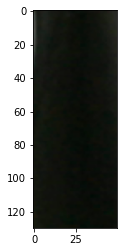

In [14]:
#Collecting anchors image
print("Collecting image")
cap = cv2.VideoCapture(1)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    
    # Create the unique file path 
    imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
    # Write out anchor image
    cv2.imwrite(imgname, frame)
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
 
 
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

plt.imshow(frame[120:120+250,200:200+250, :])

#Collecting positive image
print("Collecting image")
cap = cv2.VideoCapture(1)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    
    # Create the unique file path 
    imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
    # Write out anchor image
    cv2.imwrite(imgname, frame)
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
 
 
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [16]:
plt.imshow(frame[120:120+250,200:200+250, :])

NameError: name 'frame' is not defined

# Data Augmentation

In [361]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        #img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [362]:
import os
import uuid

In [363]:
img_path = os.path.join(ANC_PATH, '9a0b0d62-d5bd-11ec-badb-d43b04064149.jpg')
img = cv2.imread(img_path)
augmented_images = data_aug(img)

for image in augmented_images:
    cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

# Load and PreProcessing Image

**Getting Image Directories**

In [364]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [365]:
dir_test = anchor.as_numpy_iterator()

In [366]:
print(dir_test.next())

b'data\\anchor\\998ba230-d5bd-11ec-ad14-d43b04064149.jpg'


**Scale and Resize**

In [367]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img 

In [368]:
img = preprocess('data\\anchor\\9c28bb13-d5bd-11ec-ae04-d43b04064149.jpg')

In [369]:
img.numpy().max()

1.0

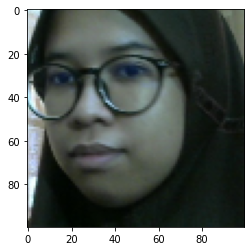

In [370]:
plt.imshow(img)

In [371]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

**Creating Labelled Dataset**

In [ ]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [372]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [373]:
samples = data.as_numpy_iterator()

In [374]:
exampple = samples.next()

In [375]:
exampple

(b'data\\anchor\\99e96b95-d5bd-11ec-8ff0-d43b04064149.jpg',
 b'data\\positive\\a6a45ca9-d5bd-11ec-a8c9-d43b04064149.jpg',
 1.0)

**Building and Training Partition**

In [376]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [377]:
res = preprocess_twin(*exampple)

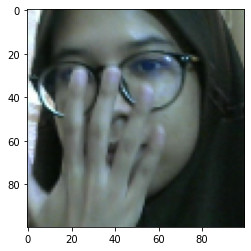

In [378]:
plt.imshow(res[1])

In [379]:
res[2]

1.0

In [380]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024) #1024

In [381]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [382]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Model Engineering

In [42]:
inp = Input(shape=(100,100,3), name='input_image')
c1 = Conv2D(64, (10,10), activation='relu')(inp)
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [ ]:
inp = Input(shape=(100,100,3), name='input_image')
c1 = Conv2D(64, (10,10), activation='relu')(inp)
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [43]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [44]:
mod.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0 

In [383]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(32, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(64, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2) #m2
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3) #c4, m3
    f1 = Flatten()(c4) #c4
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [384]:
embedding = make_embedding()

In [385]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 91, 91, 32)        9632      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 40, 40, 64)        100416    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 17, 17, 128)       131200    
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 9, 9, 128)         0 

**Build Distance Layer**

In [386]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [387]:
l1 = L1Dist()

In [388]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

**Making Siamese Model**

In [389]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [390]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [391]:
siamese_layer = L1Dist()

In [392]:
distances = siamese_layer(inp_embedding, val_embedding)

In [393]:
classifier = Dense(1, activation='sigmoid')(distances)

In [394]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_29')>

In [395]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [396]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38518624    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_23 (L1Dist)             (None, 4096)         0           embedding[0][0]     

In [397]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [398]:
siamese_model = make_siamese_model()

In [399]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38518624    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
distance (L1Dist)               (None, 4096)         0           embedding[2][0]     

# Training

In [400]:
binary_cross_loss = tf.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.Adam(1e-5) # 0.0001

In [401]:
#checkpoint
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [402]:
test_batch = train_data.as_numpy_iterator()
batch_1 = test_batch.next()
X = batch_1[:2]
y = batch_1[2]

In [403]:
y

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
      dtype=float32)

In [311]:
tf.losses.BinaryCrossentropy??

In [404]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

**Build Training Loop**

In [405]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [406]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

**Train the Model**

In [407]:
EPOCHS = 30
train(train_data, EPOCHS)


 Epoch 1/30
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 314s 11s/step
0.5703655 0.25728154 0.8833333

 Epoch 2/30
27/27 [==============================] - 302s 11s/step
0.29255164 0.2039801 0.9111111

 Epoch 3/30
27/27 [==============================] - 308s 11s/step
0.43454385 0.39534885 0.9883721

 Epoch 4/30
27/27 [==============================] - 320s 12s/step
0.51363456 0.53846157 0.973913

 Epoch 5/30
27/27 [==============================] - 319s 12s/step
0.4250895 0.8443396 0.9781421

 Epoch 6/30
27/27 [==============================] - 308s 11s/step
0.6647602 0.91943127 0.97979796

 Epoch 7/30
27/27 [==============================] - 294s 11s/step
0.14446276 0.95652175 0.980198

 Epoch 8/30
27/27 [==============================] - 296s 11s/step
0.11323241 0.97652584 0.98578197

 Epoch 9/30
27/27 [==============================]

# Model Evaluation

In [408]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

**Make Predictions**

In [409]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [410]:
test_val

array([[[[8.70833337e-01, 8.99264693e-01, 9.25735295e-01],
         [8.56127441e-01, 8.74019623e-01, 9.14215684e-01],
         [8.14460814e-01, 8.58578444e-01, 9.03431356e-01],
         ...,
         [4.75245088e-01, 5.19362748e-01, 4.37500000e-01],
         [5.04901946e-01, 5.40196061e-01, 4.65686262e-01],
         [5.25490224e-01, 5.60784340e-01, 4.88235295e-01]],

        [[8.93137276e-01, 9.28186297e-01, 9.94117618e-01],
         [8.84803951e-01, 9.10294116e-01, 9.95588243e-01],
         [8.58578444e-01, 9.07598019e-01, 9.77205873e-01],
         ...,
         [4.85294104e-01, 5.17647088e-01, 4.42156851e-01],
         [5.06862760e-01, 5.39215684e-01, 4.68137264e-01],
         [5.27450979e-01, 5.53921580e-01, 4.87254888e-01]],

        [[8.88970613e-01, 9.51715708e-01, 9.91176486e-01],
         [9.02696073e-01, 9.53921556e-01, 1.00000000e+00],
         [8.85539234e-01, 9.52696085e-01, 9.99264717e-01],
         ...,
         [4.85294104e-01, 5.11029422e-01, 4.52205896e-01],
         [

In [413]:
y_hat = siamese_model.predict([test_input, test_val])
y_hat

array([[9.9219191e-01],
       [1.3298383e-07],
       [9.9733108e-01],
       [9.6319388e-07],
       [9.5989913e-01],
       [2.9721856e-04],
       [2.2267511e-06],
       [9.9994195e-01],
       [9.8780930e-01],
       [9.5360982e-01],
       [9.4639206e-01],
       [9.8514962e-01],
       [6.7275763e-04],
       [4.3297288e-05],
       [1.9961411e-05],
       [9.9999368e-01]], dtype=float32)

In [414]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]

In [415]:
y_true

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.],
      dtype=float32)

**Metrics Calculation**

In [416]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [417]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [418]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1.0 1.0


# Visualize the Result

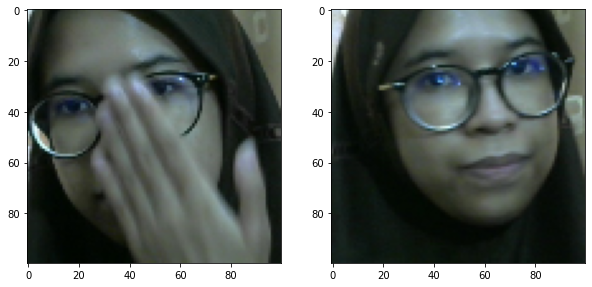

In [419]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

# Save Model

In [420]:
# Save weights
siamese_model.save('siamesemodelv2_3.h5')

In [421]:
L1Dist

__main__.L1Dist

In [422]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2_3.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [423]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

array([[9.9989140e-01],
       [1.0354199e-04],
       [9.9995732e-04],
       [9.8656988e-01]], dtype=float32)

In [424]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38518624    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_25 (L1Dist)             (None, 4096)         0           embedding[0][0]     

# Real Time Test

Verification Function

In [425]:
application_data\verification_images

SyntaxError: unexpected character after line continuation character (<ipython-input-425-10b5f818160f>, line 1)

In [426]:
os.listdir(os.path.join('application_data', 'verification_images'))

['a2943bdd-d5bd-11ec-8bd6-d43b04064149.jpg',
 'a3150545-d5bd-11ec-8dec-d43b04064149.jpg',
 'a379100c-d5bd-11ec-8152-d43b04064149.jpg',
 'a3864d6d-d5bd-11ec-a041-d43b04064149.jpg',
 'a427405c-d5bd-11ec-9109-d43b04064149.jpg',
 'a4342134-d5bd-11ec-b52d-d43b04064149.jpg',
 'a4999de2-d5bd-11ec-a7a6-d43b04064149.jpg',
 'a49eca89-d5bd-11ec-a79a-d43b04064149.jpg',
 'a4f1b946-d5bd-11ec-92b3-d43b04064149.jpg',
 'a4f53946-d5bd-11ec-81b1-d43b04064149.jpg',
 'a4fb76a4-d5bd-11ec-b338-d43b04064149.jpg',
 'a5099db5-d5bd-11ec-8dfe-d43b04064149.jpg',
 'a5268b0e-d5bd-11ec-92de-d43b04064149.jpg',
 'a5385920-d5bd-11ec-8aac-d43b04064149.jpg',
 'a58cb39a-d5bd-11ec-806c-d43b04064149.jpg',
 'a5a66a12-d5bd-11ec-bb2e-d43b04064149.jpg',
 'a5a901c4-d5bd-11ec-be1d-d43b04064149.jpg',
 'a5b0276b-d5bd-11ec-b8af-d43b04064149.jpg',
 'a5b4b83c-d5bd-11ec-97f7-d43b04064149.jpg',
 'a5bc5422-d5bd-11ec-94ae-d43b04064149.jpg',
 'a5c096d8-d5bd-11ec-80ee-d43b04064149.jpg',
 'a5c61176-d5bd-11ec-95c5-d43b04064149.jpg',
 'a5d9b2f4

In [427]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [428]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\a2943bdd-d5bd-11ec-8bd6-d43b04064149.jpg
application_data\verification_images\a3150545-d5bd-11ec-8dec-d43b04064149.jpg
application_data\verification_images\a379100c-d5bd-11ec-8152-d43b04064149.jpg
application_data\verification_images\a3864d6d-d5bd-11ec-a041-d43b04064149.jpg
application_data\verification_images\a427405c-d5bd-11ec-9109-d43b04064149.jpg
application_data\verification_images\a4342134-d5bd-11ec-b52d-d43b04064149.jpg
application_data\verification_images\a4999de2-d5bd-11ec-a7a6-d43b04064149.jpg
application_data\verification_images\a49eca89-d5bd-11ec-a79a-d43b04064149.jpg
application_data\verification_images\a4f1b946-d5bd-11ec-92b3-d43b04064149.jpg
application_data\verification_images\a4f53946-d5bd-11ec-81b1-d43b04064149.jpg
application_data\verification_images\a4fb76a4-d5bd-11ec-b338-d43b04064149.jpg
application_data\verification_images\a5099db5-d5bd-11ec-8dfe-d43b04064149.jpg
application_data\verification_images\a5268b0e-d5bd-11ec-92de-d43

In [429]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

OpenCV Real Time Verification

In [432]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

True


In [431]:
np.sum(np.squeeze(results) > 0.9)

23

In [ ]:
results